<a href="https://colab.research.google.com/github/youngIcom/Machine_Learning_Project/blob/main/Klasifikasi_pelanggan_untuk_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [4]:
file_id = '19IfOP0QmCHccMu8A6B2fCUpFqZwCxuzO'

download_url = f'https://drive.google.com/uc?id={file_id}'

data = pd.read_csv(download_url)

data.head(100)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,15699461,Fiorentini,515,Spain,Male,35,10,176273.95,1,0,1,121277.78,0
96,97,15738721,Graham,773,Spain,Male,41,9,102827.44,1,0,1,64595.25,0
97,98,15693683,Yuille,814,Germany,Male,29,8,97086.40,2,1,1,197276.13,0
98,99,15604348,Allard,710,Spain,Male,22,8,0.00,2,0,0,99645.04,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#memeriksa nilai yang hilang dari data
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

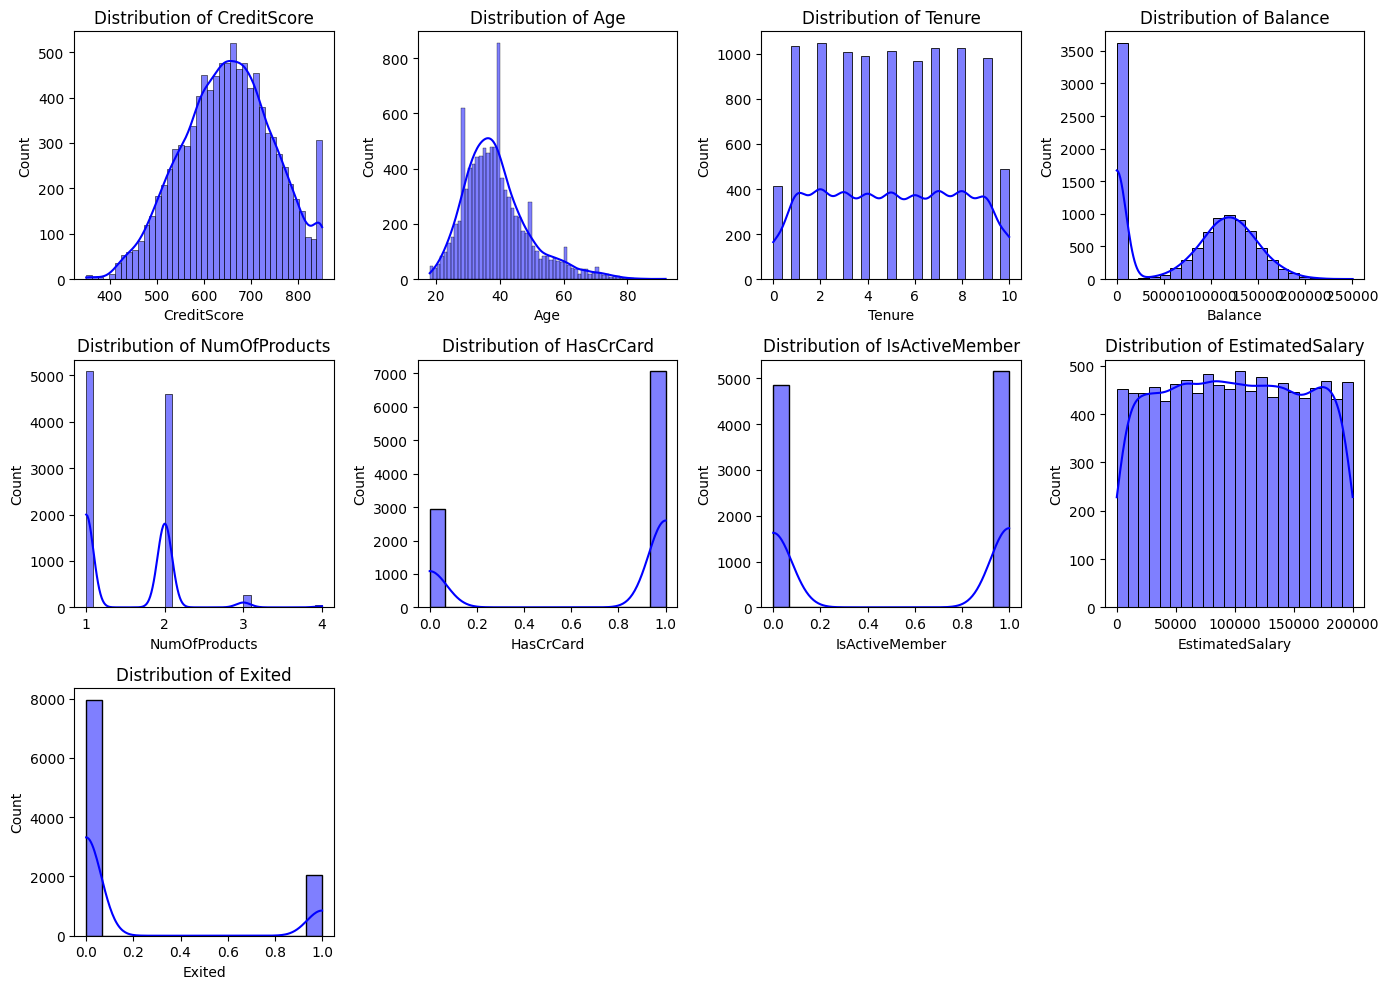

In [9]:
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
  plt.subplot(3, 4, i)
  sns.histplot(data[column], kde=True, color='blue')
  plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<ipython-input-14-b89295a99375>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')
<ipython-input-14-b89295a99375>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')


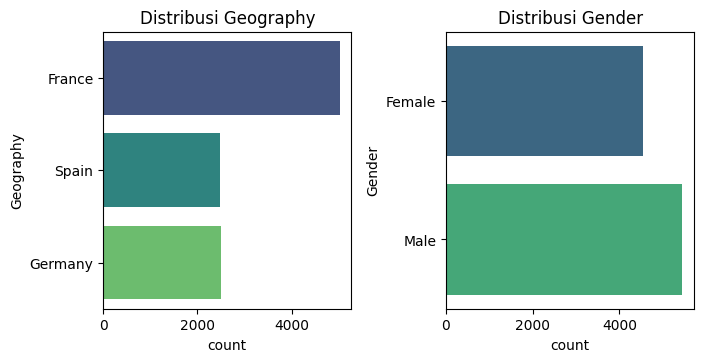

In [14]:
cat_features = data.select_dtypes(include=[object])
plt.figure(figsize=(14, 10))
for i, column in enumerate(cat_features.columns, 1):
  plt.subplot(3, 4, i)
  sns.countplot(y=data[column], palette='viridis')
  plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

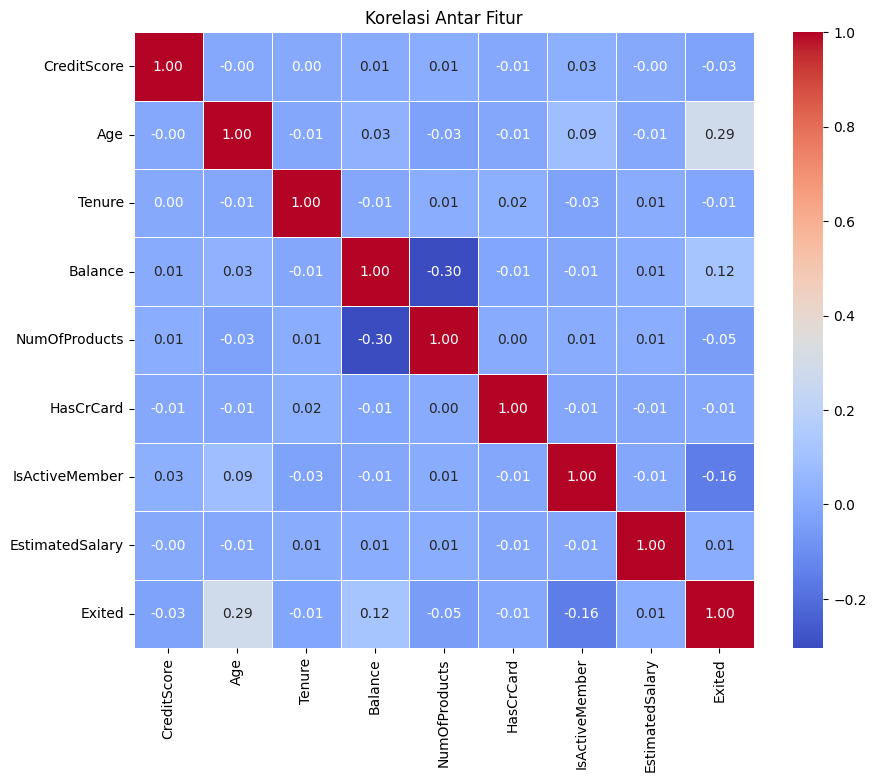

In [15]:
#membuat heatmap untuk mengetahui korelasi antara data
plt.figure(figsize=(10, 8))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi Antar Fitur')
plt.show()

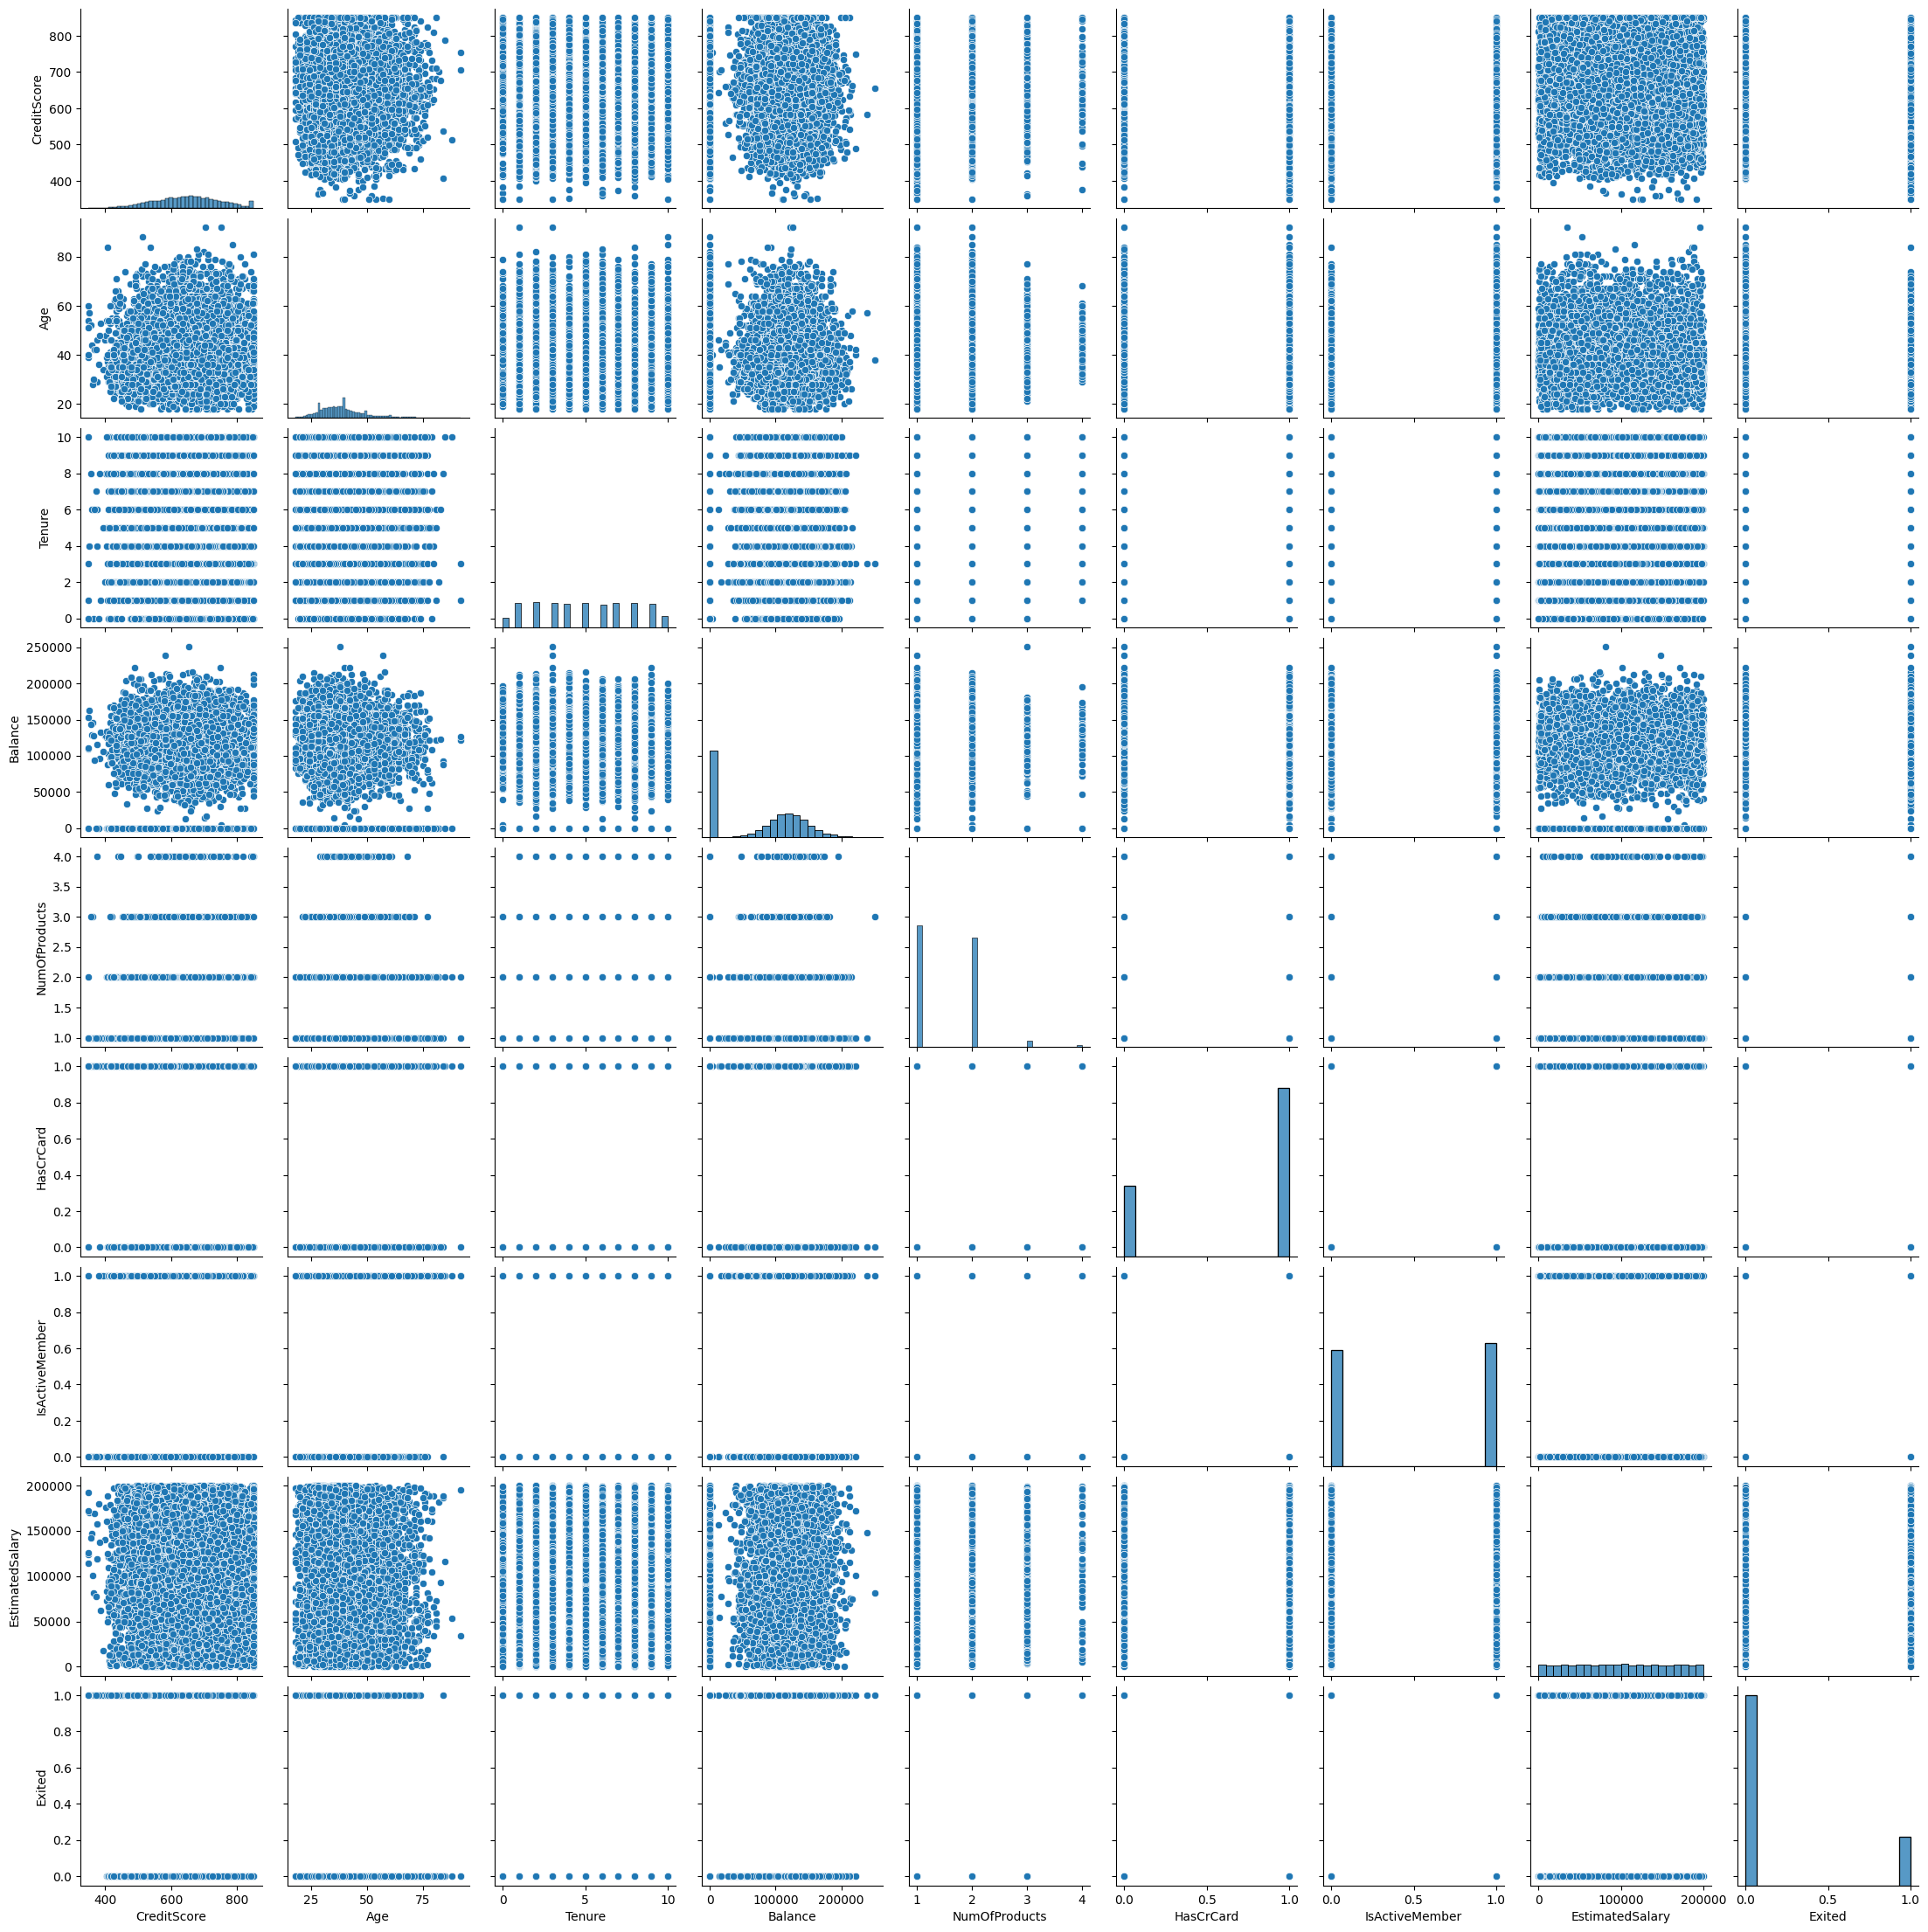

In [16]:
#pair plot untuk fitur numeric
sns.pairplot(num_features)
plt.show()

<ipython-input-23-81ea4ef3e83e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette='viridis')


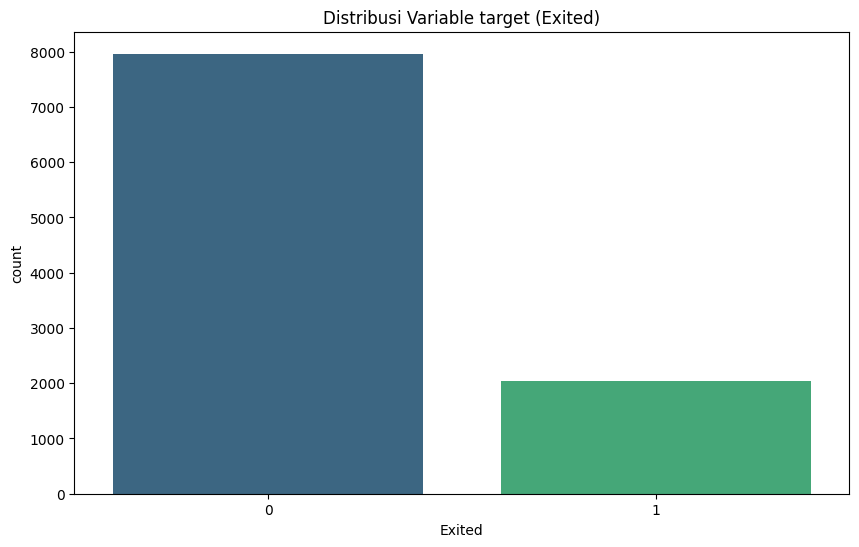

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Exited', data=data, palette='viridis')
plt.title(f'Distribusi Variable target (Exited)')
plt.show()

In [25]:
#Label Encoder
#membuat instance label encoder
label_encoder = LabelEncoder()

#list kolom kategorikal yang perlu di encode
categorical_columns = ['Geography', 'Gender']

#encode kolom kategorikal
for column in categorical_columns:
  data[column] = label_encoder.fit_transform(data[column])

data.head(10)



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


# Melakukan Data Splitting

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

#pisahkan fitur (x) dan target (y)
X = data.drop(columns=['Exited'])
y = data['Exited']


#split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training Set Shape : X_train={X_train.shape}, y_train={y_train.shape}\n")
print(f"Test set shape : X_test={X_test.shape}, y_test={y_test.shape}\n")


Training Set Shape : X_train=(8000, 10), y_train=(8000,)

Test set shape : X_test=(2000, 10), y_test=(2000,)



# Pelatihan Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print(f'Model Training {knn}, {dt}, {rf}, {svm}, {nb} selesai!!')

Model Training KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), GaussianNB() selesai!!


# Evaluasi Model

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  results = {
      'Confusion Matrix': cm,
      'True Positive (TP)': tp,
      'False Positive (FP)': fp,
      'True Negative (TN)': tn,
      'False Negative (FN)': fn,
      'Accuracy': accuracy_score(y_test, y_pred),
      'Precision': precision_score(y_test, y_pred),
      'Recall': recall_score(y_test, y_pred),
      'F1 Score': f1_score(y_test, y_pred)
  }
  return results

results = {
    'K-Nearest Neighbors': evaluate_model(knn, X_test, y_test),
    'Decision Tree': evaluate_model(dt, X_test, y_test),
    'Random Forest': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine': evaluate_model(svm, X_test, y_test),
    'Naive Bayes': evaluate_model(nb, X_test, y_test)
}

#buat variable dataFram baru untuk meringkas hasil
df_summary = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
  rows.append({
      'Model': model_name,
      'Accuracy': metrics['Accuracy'],
      'Precision': metrics['Precision'],
      'Recall': metrics['Recall'],
      'F1 Score': metrics['F1 Score']
  })

df_summary = pd.DataFrame(rows)

#tampilkan dataframe
print(df_summary)

                    Model  Accuracy  Precision    Recall  F1 Score
0     K-Nearest Neighbors    0.8240   0.595349  0.325700  0.421053
1           Decision Tree    0.7840   0.456376  0.519084  0.485714
2           Random Forest    0.8660   0.757202  0.468193  0.578616
3  Support Vector Machine    0.8530   0.827815  0.318066  0.459559
4             Naive Bayes    0.8285   0.681159  0.239186  0.354049
